<a href="https://colab.research.google.com/github/khaeraniazi/khaerani/blob/master/StudentProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khaerani Nur Azizah StudentProject1

##Data Preprocessing

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# baca file csv
df=pd.read_csv('/content/drive/MyDrive/training/Salary_dataset.csv')
# tampilkan data
df.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
# cek tipe data
df.dtypes

No                   int64
YearsExperience    float64
Salary             float64
dtype: object

In [6]:
# tampilkan semua kolom
print("Column Names:" , df.columns)

Column Names: Index(['No', 'YearsExperience', 'Salary'], dtype='object')


In [7]:
# menampilkan index

print("DataFrame Index: ", df.index)

DataFrame Index:  RangeIndex(start=0, stop=30, step=1)


In [8]:
# menampilkan describe data
df.describe()

,No,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


<Axes: >

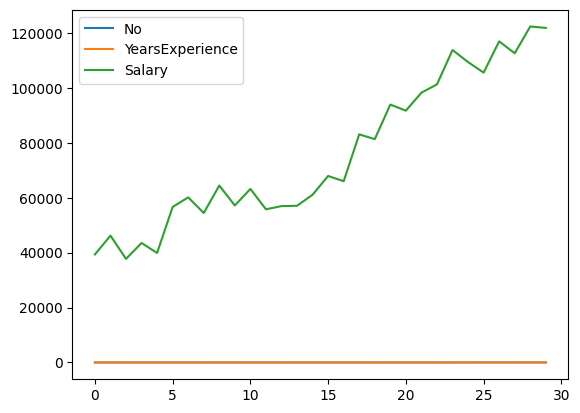

In [9]:
# membuat plot data
df.plot()

In [10]:
# menghapus column 'No'
df = df.drop(['No'], axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [11]:
# pengecekan apakah terdapat NULL 
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
# pengecekan apakah terdapat data yang duplikat 
df.duplicated().sum()

0

In [13]:
# covariance: Ini mengembalikan co-variance antara kolom yang sesuai
df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [14]:
#untuk melihat korelasi antar feature
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##Ordinary Least Squares (OLS)
Ordinary Least Squares (OLS) adalah teknik umum untuk memperkirakan koefisien persamaan regresi linier yang menggambarkan hubungan antara satu atau lebih variabel kuantitatif independen dan variabel dependen.

In [15]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df.size

60

In [18]:
df.shape

(30, 2)

In [19]:
#membuat model OLS
salary_ols =smf.ols(formula='Salary~YearsExperience',data=df).fit()

In [20]:
salary_ols.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [21]:
salary_ols.pvalues

Intercept          1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

In [22]:
salary_ols.rsquared

0.9569566641435086

In [23]:
salary_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        09:15:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Prediksi salary berdasarkan pengalaman kerja
salary_pred=salary_ols.predict(pd.DataFrame(df['YearsExperience']))
salary_pred

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [25]:
# menghitung RMSE dan RSE untuk salary_ols
df['salary_pred']=salary_pred

# RMSE
df['RSEd']=(df['Salary']-df['salary_pred'])**2
RSEd=df.sum()['RSEd']
RMSE=np.sqrt(RSEd/200)

# RSE
salary_pred_mean=np.mean(df['salary_pred'])
df['RSEp']=(salary_pred_mean-df['salary_pred'])**2
RSEp=df.sum()['RSEp']
RSE=RSEd/RSEp

salary_mean = np.mean(df['Salary'])
error=RMSE/salary_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(2165.7891767995657, 0.044979399244809, 0.028495726235455578)

In [26]:
# pakai fungsi rmse
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_val = rmse(df['Salary'], salary_pred)
rmse_val

5592.043608760659

Text(0.5, 1.0, 'Predicted Salary vs YearsExperience-OLS')

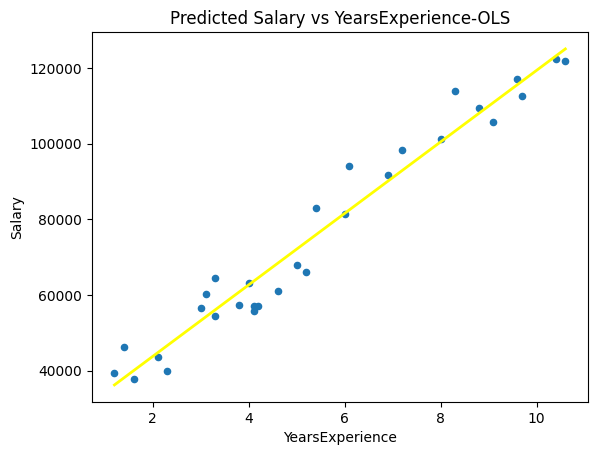

In [48]:
# Plot Salary yang diprediksi vs YearsExperience 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred,c='yellow',linewidth=2)
plt.title('Predicted Salary vs YearsExperience-OLS')

##BayesianRidge

In [36]:
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [37]:
regr_bayes = linear_model.BayesianRidge()
regr_bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

In [38]:
years = df['YearsExperience'].values.reshape(-1,1)
salary = df['Salary'].values.reshape(-1,1)

# Train model dengan training set
regr_bayes.fit(years, salary.ravel())

# Prediksi dengan data testing
salary_pred2 = regr_bayes.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred2, squared = False))

RMSE: 5592.19


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

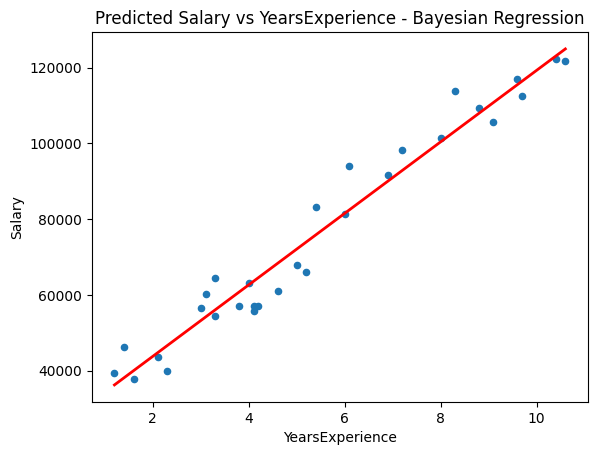

In [39]:
# Plot pengalaman yang diprediksi vs salary 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred2,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')

##Support Vector Machine (SVM) Regression

In [43]:
# buat objek SVM regression
from sklearn import svm
regr_svm = svm.LinearSVR()
regr_svm.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [45]:
# Train modeldengan training set
regr_svm1.fit(years, salary.ravel())

# buat prediksi dengan data testing
salary_pred3 = regr_svm1.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred3, squared = False))

RMSE: 79636.99


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - SVM')

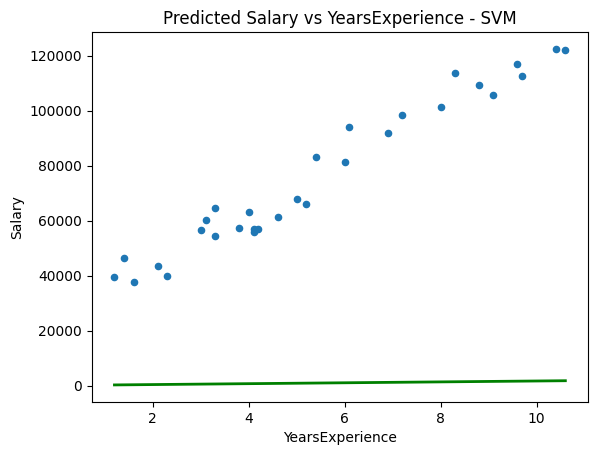

In [49]:
# Plot salary yang diprediksi vs pengalaman 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred3,c='green',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - SVM')